In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Data Mining + DL/Data Mining/data')

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras as keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

# Accessing Data:

## `Mental Health in Tech Survey` data:

- There are 1259 observations and 27 attributes.

- Attributes:
  1. `Timestamp`: Time the survey was submitted
  2. `Age`: Respondent age
  3. `Gender`: Respondent gender
  4. `Country`: Respondent country
  5. `state`: If you live in the United States, which state or territory do you live in?
  6. `self_employed`: Are you self-employed?
  7. `family_history`: Family history of mental illness? (Y/N)
  8. `treatment`: Treatment for a mental health condition? (Y/N)
  9. `work_interfere`: If you have a mental health condition, do you feel that it interferes with your work?
  10. `no_employees`: How many employees does your company or organization have?
  11. `remote_work`: Do you work remotely at least 50% of the time?
  12. `tech_company`: Is your employer primarily a tech company/organization?
  13. `benefits`: Does your employer provide mental health benefits?
  14. `care_options`: Do you know the options for mental health care your employer provides?
  15. `wellness_program`: Has your employer ever discussed mental health as part of an employee wellness program?
  16. `seek_help`: Does your employer provide resources to learn more about mental health issues and how to seek help?
  17. `anonymity`: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
  18. `leave`: How easy is it for you to take medical leave for a mental health condition?
  19. `mental_health_consequence`: Do you think that discussing a mental health issue with your employer would have negative consequences?
  20. `phys_health_consequence`: Do you think that discussing a physical health issue with your employer would have negative consequences?
  21. `coworkers`: Would you be willing to discuss a mental health issue with your coworkers?
  22. `supervisor`: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
  23. `mental_health_interview`: Would you bring up a mental health issue with a potential employer in an interview?
  24. `physhealthinterview`: Would you bring up a physical health issue with a potential employer in an interview?
  25. `mental_vs_physical`: Do you feel that your employer takes mental health as seriously as physical health?
  26. `obs_consequence`: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
  27. `comments`: Any additional notes or comments

In [ ]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.shape

(1259, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.describe(include = 'all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing Data:

## Normalize `Age` attribute:

In [ ]:
#df['Age'].value_counts()

In [ ]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
#df['Age'].value_counts()

## Group_by `Gender` attribute:

In [ ]:
# df['Gender'].value_counts()

In [ ]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df['Gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

## Remove unimportant attributes:

In [ ]:
df.drop(['Timestamp','comments','state'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               263
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

## Replace NAN values of `work_interfere` and `self_employed` with modes

In [ ]:
df['work_interfere'].value_counts()

Sometimes    464
Never        213
Rarely       173
Often        141
Name: work_interfere, dtype: int64

In [ ]:
df['self_employed'].value_counts()

No     1092
Yes     144
Name: self_employed, dtype: int64

In [ ]:
df['work_interfere'].fillna(df['work_interfere'].mode().iloc[0], inplace = True)
df['self_employed'].fillna(df['self_employed'].mode().iloc[0], inplace = True)

In [ ]:
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
df.shape

(1254, 24)

In [ ]:
#df.to_csv('clean_data.csv',index = False) 

In [ ]:
# from google.colab import files
# files.download("clean_data.csv")

# Exploratory Data Analysis:

## Number of people who sought treatment

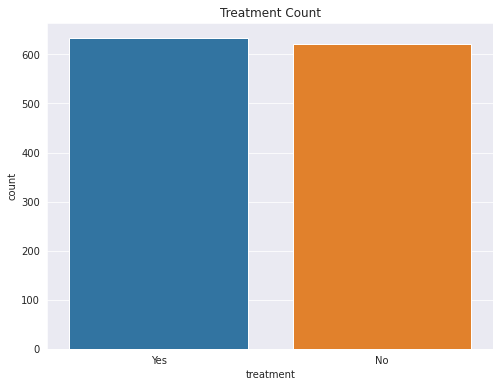

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df, x = 'treatment').set_title('Treatment Count')
plt.show()

## Age histogram with respect to treatment

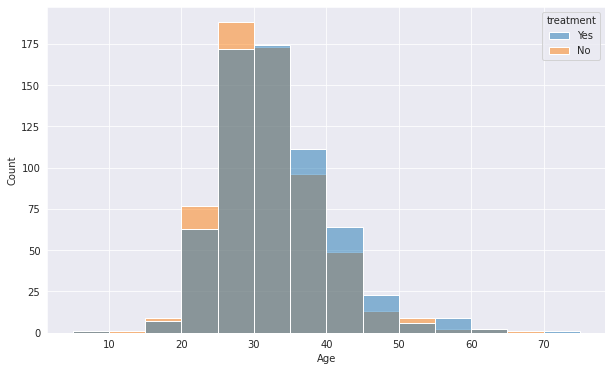

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(data = df, x = 'Age', binwidth= 5, hue='treatment')
plt.show()

Gender distribution of participants

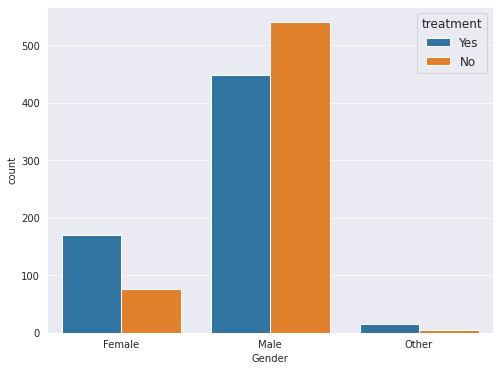

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df, x = 'Gender', hue='treatment')
plt.legend(title = 'treatment', fontsize = 12, title_fontsize = 12)
plt.show()

## Self-employed or not

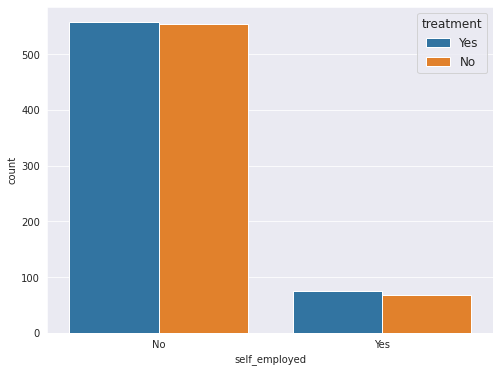

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df, x = 'self_employed', hue='treatment')
plt.legend(title = 'treatment', fontsize = 12, title_fontsize = 12)
plt.show()

## Do people feel that mental health problems interfere with their work?

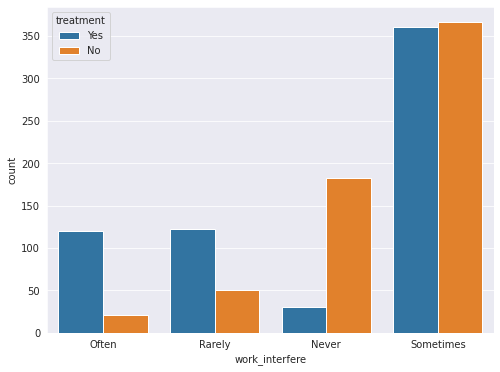

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df , x = 'work_interfere', hue = 'treatment')
plt.show()

## Do people have a family history of mental illness?

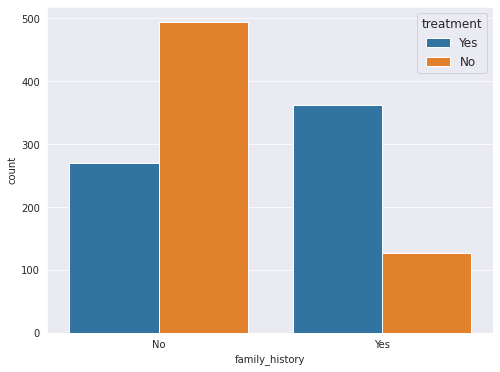

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df , x = 'family_history', hue = 'treatment')
plt.legend(title = 'treatment', fontsize = 12, title_fontsize = 12)
plt.show()

## Do people work remotely?

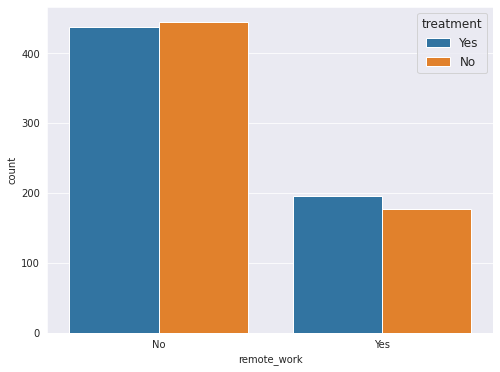

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df , x = 'remote_work', hue= 'treatment')
plt.legend(title = 'treatment', fontsize = 12, title_fontsize = 12)
plt.show()

## Count plot for number of employees of the companies participants' work for

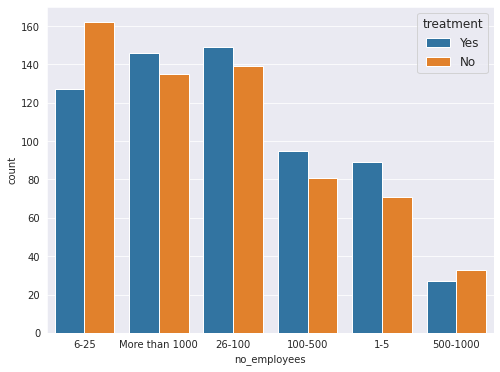

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df , x = 'no_employees', hue= 'treatment')
plt.legend(title = 'treatment', fontsize = 12, title_fontsize = 12)
plt.show()

## Do people think discussing mental health consequences with employers would have negative consequences?

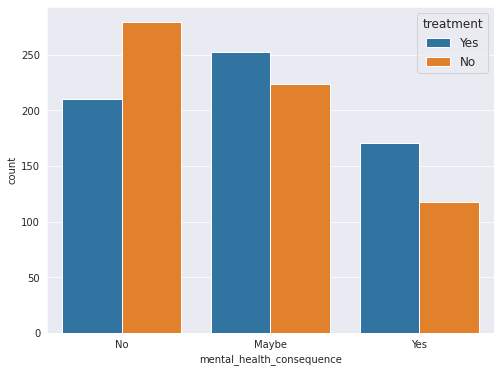

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df , x = 'mental_health_consequence', hue= 'treatment')
plt.legend(title = 'treatment', fontsize = 12, title_fontsize = 12)
plt.show()

## Do people discuss their mental health issues with their coworkers?

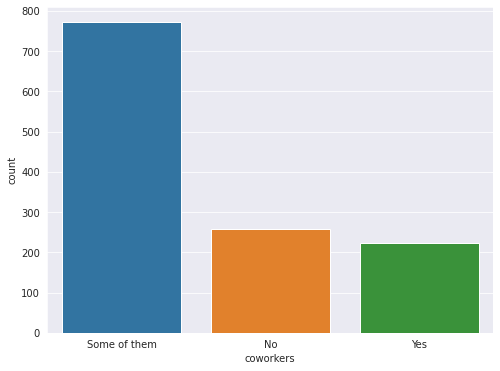

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = df , x = 'coworkers')
plt.show()

# Prediction of whether a person will seek mental illness treatment 

## Data preprocessing before feeding them into the models

In [ ]:
df1 = df[['Gender', 'self_employed', 'family_history',
           'treatment', 'work_interfere', 'no_employees', 'remote_work',
           'tech_company', 'benefits', 'care_options', 'wellness_program',
           'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
           'phys_health_consequence', 'coworkers', 'supervisor',
           'phys_health_interview', 'mental_vs_physical', 'obs_consequence'
          ]] #all the columns that I'm interested

In [ ]:
Gender = ['Male', 'Female', 'Other']
self_employed = ['No','Yes']
family_history = ['No','Yes']
work_interfere  = ['Never','Rarely','Sometimes','Often']
no_employees  = ['1-5','6-25','26-100','100-500','500-1000','More than 1000']
remote_work  = ['No','Yes']
tech_company  = ['No','Yes']
benefits = ['No','Don\'t know','Yes'] 
care_options = ['No','Not sure','Yes']
wellness_program  =['No','Don\'t know','Yes']
seek_help= ['No','Don\'t know','Yes']
anonymity = ['No','Don\'t know','Yes']
leave = [ 'Very easy', 'Somewhat easy',"Don't know" ,'Somewhat difficult','Very difficult']
mental_health_consequence = ['No','Maybe','Yes']
phys_health_consequence = ['No','Maybe','Yes']
coworkers = ['No','Some of them','Yes']
supervisor = ['No','Some of them','Yes']
mental_health_interview = ['No','Maybe','Yes']
phys_health_interview = ['No','Maybe','Yes']
mental_vs_physical = ['Don\'t know','No','Yes']
obs_consequence = ['No','Yes']

cols = [Gender, self_employed, family_history,
        work_interfere, no_employees, remote_work,
        tech_company, benefits, care_options, wellness_program,
        seek_help, anonymity, leave, mental_health_consequence,
        phys_health_consequence, coworkers, supervisor,
        phys_health_interview, mental_vs_physical, obs_consequence]

In [ ]:
train, test = train_test_split(df1, test_size= 0.15, stratify= df1['treatment'], random_state=42)
#splitting the whole data into training set and test set

In [ ]:
X_train = train.drop('treatment',axis=1)
y_train = train['treatment']

X_test = test.drop('treatment',axis=1)
y_test = test['treatment']

#create independent variables and target variable dataframes

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=list(cols))
features = list(X_train.columns)

X_train[features[:]] = ord_encoder.fit_transform(X_train.iloc[:,:])
X_test[features[:]] = ord_encoder.fit_transform(X_test.iloc[:,:])

mm_scaler = StandardScaler()
X_train[features] = mm_scaler.fit_transform(X_train)
X_test[features] = mm_scaler.fit_transform(X_test)

#encode the ordinal values of all the features in the X_train and X_test dataframe

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
y_train = lb_encoder.fit_transform(y_train)
y_test = lb_encoder.fit_transform(y_test)

#encode the labels of the target variable

# Building models

In [ ]:
def train_eval(model, X, y, model_name):
    model.fit(X, y)
    y_pred = model.predict(X)
    f1_train = f1_score(y, y_pred)
    acc_train = accuracy_score(y, y_pred)

    #Cross validation
    f1_val = cross_val_score(model, X, y, scoring='f1', cv=10)
    acc = cross_val_score(model, X, y, scoring='accuracy', cv=10)
    
    # return the scores
    score = pd.DataFrame({'Name' : model_name ,'F1_score_train' : [f1_train], 'Accuracy_train': [acc_train],
                          'F1_score_validation' : [f1_val.mean()], 
                          'Accuracy_validation': [acc.mean()]})
    
    return score

### Logistic Regression

In [ ]:
logisticreg = LogisticRegression(solver='liblinear')
df8 = train_eval(logisticreg, X_train, y_train, 'Logistic Regression')
df8

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Logistic Regression,0.74221,0.743662,0.726915,0.728505


### Decision Trees

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=42)
df2 = train_eval(decisiontree, X_train, y_train, 'Decision Tree')
df2

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Decision Tree,1.0,1.0,0.660754,0.663816


In [ ]:
#Tuning decision trees

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(estimator=dt, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring = "f1")
gs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [ ]:
dt = gs.best_estimator_ #best parameters for the decision tree for the training data
dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=42)

In [ ]:
#retrain the Decision Tree model
df3 = train_eval(dt, X_train, y_train, 'Decision Tree Tuned')
df3

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Decision Tree Tuned,0.78376,0.769953,0.748084,0.741774


In [ ]:
decision_tree_df = df2.append(df3)
decision_tree_df

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Decision Tree,1.00000,1.000000,0.660754,0.663816
0,Decision Tree Tuned,0.78376,0.769953,0.748084,0.741774


### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
df4 = train_eval(rf, X_train, y_train, 'Random Forest Classifier')
df4

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Random Forest Classifier,1.0,1.0,0.74804,0.749224


In [ ]:
#Tuning Random Forest
param_grid = [
    {'n_estimators':[3,10,30,50,100],'max_features':[2,4,6,8],'max_depth' : [1,2,3,4]}
]
rf1 = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf1, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='f1')

In [ ]:
rf1 = grid_search.best_estimator_
df5 = train_eval(rf1, X_train, y_train, 'Random Forest Tuned')
df5

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Random Forest Tuned,0.781505,0.773709,0.765141,0.761427


In [ ]:
rf1

RandomForestClassifier(max_depth=4, max_features=6, n_estimators=30,
                       random_state=42)

In [ ]:
random_forest_df = df4.append(df5)
random_forest_df 

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Random Forest Classifier,1.000000,1.000000,0.748040,0.749224
0,Random Forest Tuned,0.781505,0.773709,0.765141,0.761427


### Support Vector Machines

In [ ]:
svc = SVC()
df6 = train_eval(svc, X_train, y_train, 'Support Vector Machines Classifier')
df6

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Support Vector Machines Classifier,0.815023,0.815023,0.723065,0.728549


In [ ]:
#Tuning SVM
params = {'C': [0.01,0.01,0.1,0.15,0.2,0.25,0.5,0.75,1,2,10,100],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    }
svc = SVC()
grid_cv = GridSearchCV(svc, param_grid = params, cv=5, scoring='f1', verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1,
                               2, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [ ]:
scv = grid_cv.best_estimator_
df7 = train_eval(scv, X_train, y_train, 'Support Vector Machines Tuned')
df7

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Support Vector Machines Tuned,0.848263,0.844131,0.737322,0.729475


In [ ]:
scv

SVC(C=0.5, gamma=0.1)

In [ ]:
svm_df = df6.append(df7)
svm_df

,Name,F1_score_train,Accuracy_train,F1_score_validation,Accuracy_validation
0,Support Vector Machines Classifier,0.815023,0.815023,0.723065,0.728549
0,Support Vector Machines Tuned,0.848263,0.844131,0.737322,0.729475


### Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
X_train.shape

(1065, 20)

In [ ]:
np.random.seed(1)
mlp = Sequential()
mlp.add(Dense(20, input_shape = (20,), activation = 'tanh'))
mlp.add(Dense(1, activation = 'sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.1)
mlp.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
mlp.fit(X_train, y_train, epochs=1000)
pred = (mlp.predict(X_test) > 0.5).astype("int32")
pred1 = (mlp.predict(X_train) > 0.5).astype("int32")
f1_train = f1_score(y_train, pred1)
f1 = f1_score(pred, y_test)
acc_train = accuracy_score(pred1, y_train)
acc = accuracy_score(pred, y_test)

In [ ]:
df15 = pd.DataFrame({'Name' : 'Neural Networks' , 'F1_score_train': [f1_train],
                      'Accuracy_train': [acc_train], 'F1_score_test' : [f1],
                     'Accuracy_test': [acc]})
df15

,Name,F1_score_train,Accuracy_train,F1_score_test,Accuracy_test
0,Neural Networks,1.0,1.0,0.637838,0.645503


### Prediction on test set

In [ ]:
y_test_pred = rf1.predict(X_test)
df9 = pd.DataFrame({'Name' : 'Random Forest Tuned' ,'F1_score_test' : [f1_score(y_test, y_test_pred)],
                    'Accuracy_test': [accuracy_score(y_test, y_test_pred)]
                    })
df9

,Name,F1_score_test,Accuracy_test
0,Random Forest Tuned,0.746114,0.740741


In [ ]:
y_test_pred = dt.predict(X_test)
df10 = pd.DataFrame({'Name' : 'Decision Tree Tuned' ,'F1_score_test' : [f1_score(y_test, y_test_pred)],
                     'Accuracy_test': [accuracy_score(y_test, y_test_pred)]})
df10

,Name,F1_score_test,Accuracy_test
0,Decision Tree Tuned,0.743719,0.730159


In [ ]:
y_test_pred = scv.predict(X_test)
df11 = pd.DataFrame({'Name' : 'Support Vector Machines Tuned' ,'F1_score_test' : [f1_score(y_test, y_test_pred)],
                     'Accuracy_test': [accuracy_score(y_test, y_test_pred)]})
df11

,Name,F1_score_test,Accuracy_test
0,Support Vector Machines Tuned,0.75,0.746032


In [ ]:
y_test_pred = logisticreg.predict(X_test)
df12 = pd.DataFrame({'Name' : 'Logistic Regression' ,'F1_score_test' : [f1_score(y_test, y_test_pred)],
                     'Accuracy_test': [accuracy_score(y_test, y_test_pred)]})
df12

,Name,F1_score_test,Accuracy_test
0,Logistic Regression,0.739583,0.73545


In [ ]:
df13 = pd.concat([decision_tree_df, random_forest_df, svm_df, df8])
df14 = pd.concat([df9, df10, df11, df12, df15])
full_score = pd.merge(df13, df14, on = 'Name', how = 'outer')
full_score

,Name,F1_score_train_x,Accuracy_train_x,F1_score_validation,Accuracy_validation,F1_score_test,Accuracy_test,F1_score_train_y,Accuracy_train_y
0,Decision Tree,1.000000,1.000000,0.660754,0.663816,NaN,NaN,NaN,NaN
1,Decision Tree Tuned,0.783760,0.769953,0.748084,0.741774,0.743719,0.730159,NaN,NaN
2,Random Forest Classifier,1.000000,1.000000,0.748040,0.749224,NaN,NaN,NaN,NaN
3,Random Forest Tuned,0.781505,0.773709,0.765141,0.761427,0.746114,0.740741,NaN,NaN
4,Support Vector Machines Classifier,0.815023,0.815023,0.723065,0.728549,NaN,NaN,NaN,NaN
5,Support Vector Machines Tuned,0.848263,0.844131,0.737322,0.729475,0.750000,0.746032,NaN,NaN
6,Logistic Regression,0.742210,0.743662,0.726915,0.728505,0.739583,0.735450,NaN,NaN
7,Neural Networks,NaN,NaN,NaN,NaN,0.637838,0.645503,1.0,1.0


## How much do the features impact whether a person decides to seek mental illness support?

In [ ]:
#decision tree
data = {'feature_names':features,'feature_importance': dt.feature_importances_}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
featureimp_df.head(10)

,feature_names,feature_importance
2,family_history,0.359825
3,work_interfere,0.315539
8,care_options,0.150893
13,mental_health_consequence,0.053582
7,benefits,0.042682
12,leave,0.029527
16,supervisor,0.022246
5,remote_work,0.011984
10,seek_help,0.006913
18,mental_vs_physical,0.006809


In [ ]:
#random forest
data = {'feature_names':features,'feature_importance': rf1.feature_importances_}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
featureimp_df.head(10)

,feature_names,feature_importance
3,work_interfere,0.326953
2,family_history,0.266633
8,care_options,0.148258
7,benefits,0.057073
0,Gender,0.046123
12,leave,0.038611
13,mental_health_consequence,0.014140
4,no_employees,0.013519
19,obs_consequence,0.012750
15,coworkers,0.011668
